In [2]:
!pip3 install quandl

You should consider upgrading via the 'c:\users\sagra\miniconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
import quandl

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [5]:
df = quandl.get("WIKI/AAPL")

In [6]:
df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.750,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.250,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.250,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.870,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.630,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.040000,175.090000,171.260000,171.270000,35247358.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.000000,172.680000,168.600000,168.845000,41051076.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.390000,169.920000,164.940000,164.940000,40248954.0


In [7]:
df.shape

(9400, 12)

In [8]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

In [9]:
df.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,9400.000000,9400.000000,9400.000000,9400.000000,9.400000e+03,9400.000000,9400.000000,9400.000000,9400.000000,9400.000000,9400.000000,9.400000e+03
mean,101.233437,102.466958,99.896250,101.194472,1.198560e+07,0.003633,1.000957,21.571019,21.774929,21.351252,21.567664,8.860156e+07
std,135.169307,136.294005,133.829528,135.087350,1.662310e+07,0.088269,0.064409,39.272529,39.584888,38.942651,39.271266,8.704777e+07
min,11.120000,11.120000,11.000000,11.000000,4.471000e+03,0.000000,1.000000,0.163495,0.163495,0.161731,0.161731,2.503760e+05
25%,27.000000,27.500000,26.500000,27.000000,1.232075e+06,0.000000,1.000000,0.923453,0.940280,0.904096,0.922730,3.461080e+07
50%,43.750000,44.500000,43.000000,43.880000,3.776200e+06,0.000000,1.000000,1.437461,1.468272,1.410762,1.437445,6.069700e+07
75%,110.120000,111.755000,108.747500,110.060000,1.808312e+07,0.000000,1.000000,20.270182,20.565604,19.905845,20.294924,1.109031e+08
max,702.410000,705.070000,699.570000,702.100000,1.895606e+08,3.290000,7.000000,182.590000,183.500000,180.210000,181.720000,1.855410e+09


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9400 entries, 1980-12-12 to 2018-03-27
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         9400 non-null   float64
 1   High         9400 non-null   float64
 2   Low          9400 non-null   float64
 3   Close        9400 non-null   float64
 4   Volume       9400 non-null   float64
 5   Ex-Dividend  9400 non-null   float64
 6   Split Ratio  9400 non-null   float64
 7   Adj. Open    9400 non-null   float64
 8   Adj. High    9400 non-null   float64
 9   Adj. Low     9400 non-null   float64
 10  Adj. Close   9400 non-null   float64
 11  Adj. Volume  9400 non-null   float64
dtypes: float64(12)
memory usage: 954.7 KB


In [11]:
df.isnull().sum()

Open           0
High           0
Low            0
Close          0
Volume         0
Ex-Dividend    0
Split Ratio    0
Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64

In [12]:
#high low percentage
df['HL_PCT']= (df['Adj. High']- df['Adj. Low'])/df['Adj. Close']* 100

#rate of incraese
df['PCT_change']= (df['Adj. Close']- df['Adj. Open'])/df['Adj. Open']* 100

In [13]:
#shifting close price
df['new_Adj. close']= df['Adj. Close'].shift(-1)

In [14]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_change,new_Adj. close
Date,,,,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0,0.417391,0.000000,0.400652
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0,0.477064,-0.474799,0.371246
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0,0.475248,-0.473000,0.380362
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0,0.502513,0.000000,0.391536
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0,0.450620,0.000000,0.415355


In [15]:
(df[['Ex-Dividend']]<3.29).value_counts()

Ex-Dividend
True           9399
False             1
dtype: int64

In [16]:
(df[['Split Ratio']]==7.0).value_counts()

Split Ratio
False          9399
True              1
dtype: int64

# Corelation

<AxesSubplot:>

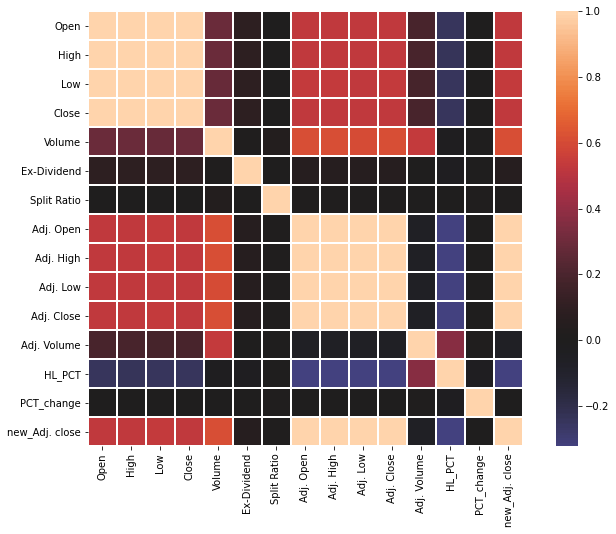

In [17]:
corr = df.corr()
f = plt.subplots(figsize =(12,8))
cmap = sns.diverging_palette(230,20 ,as_cmap = True)
sns.heatmap(corr, center = 0,linewidth = .5, square = True)

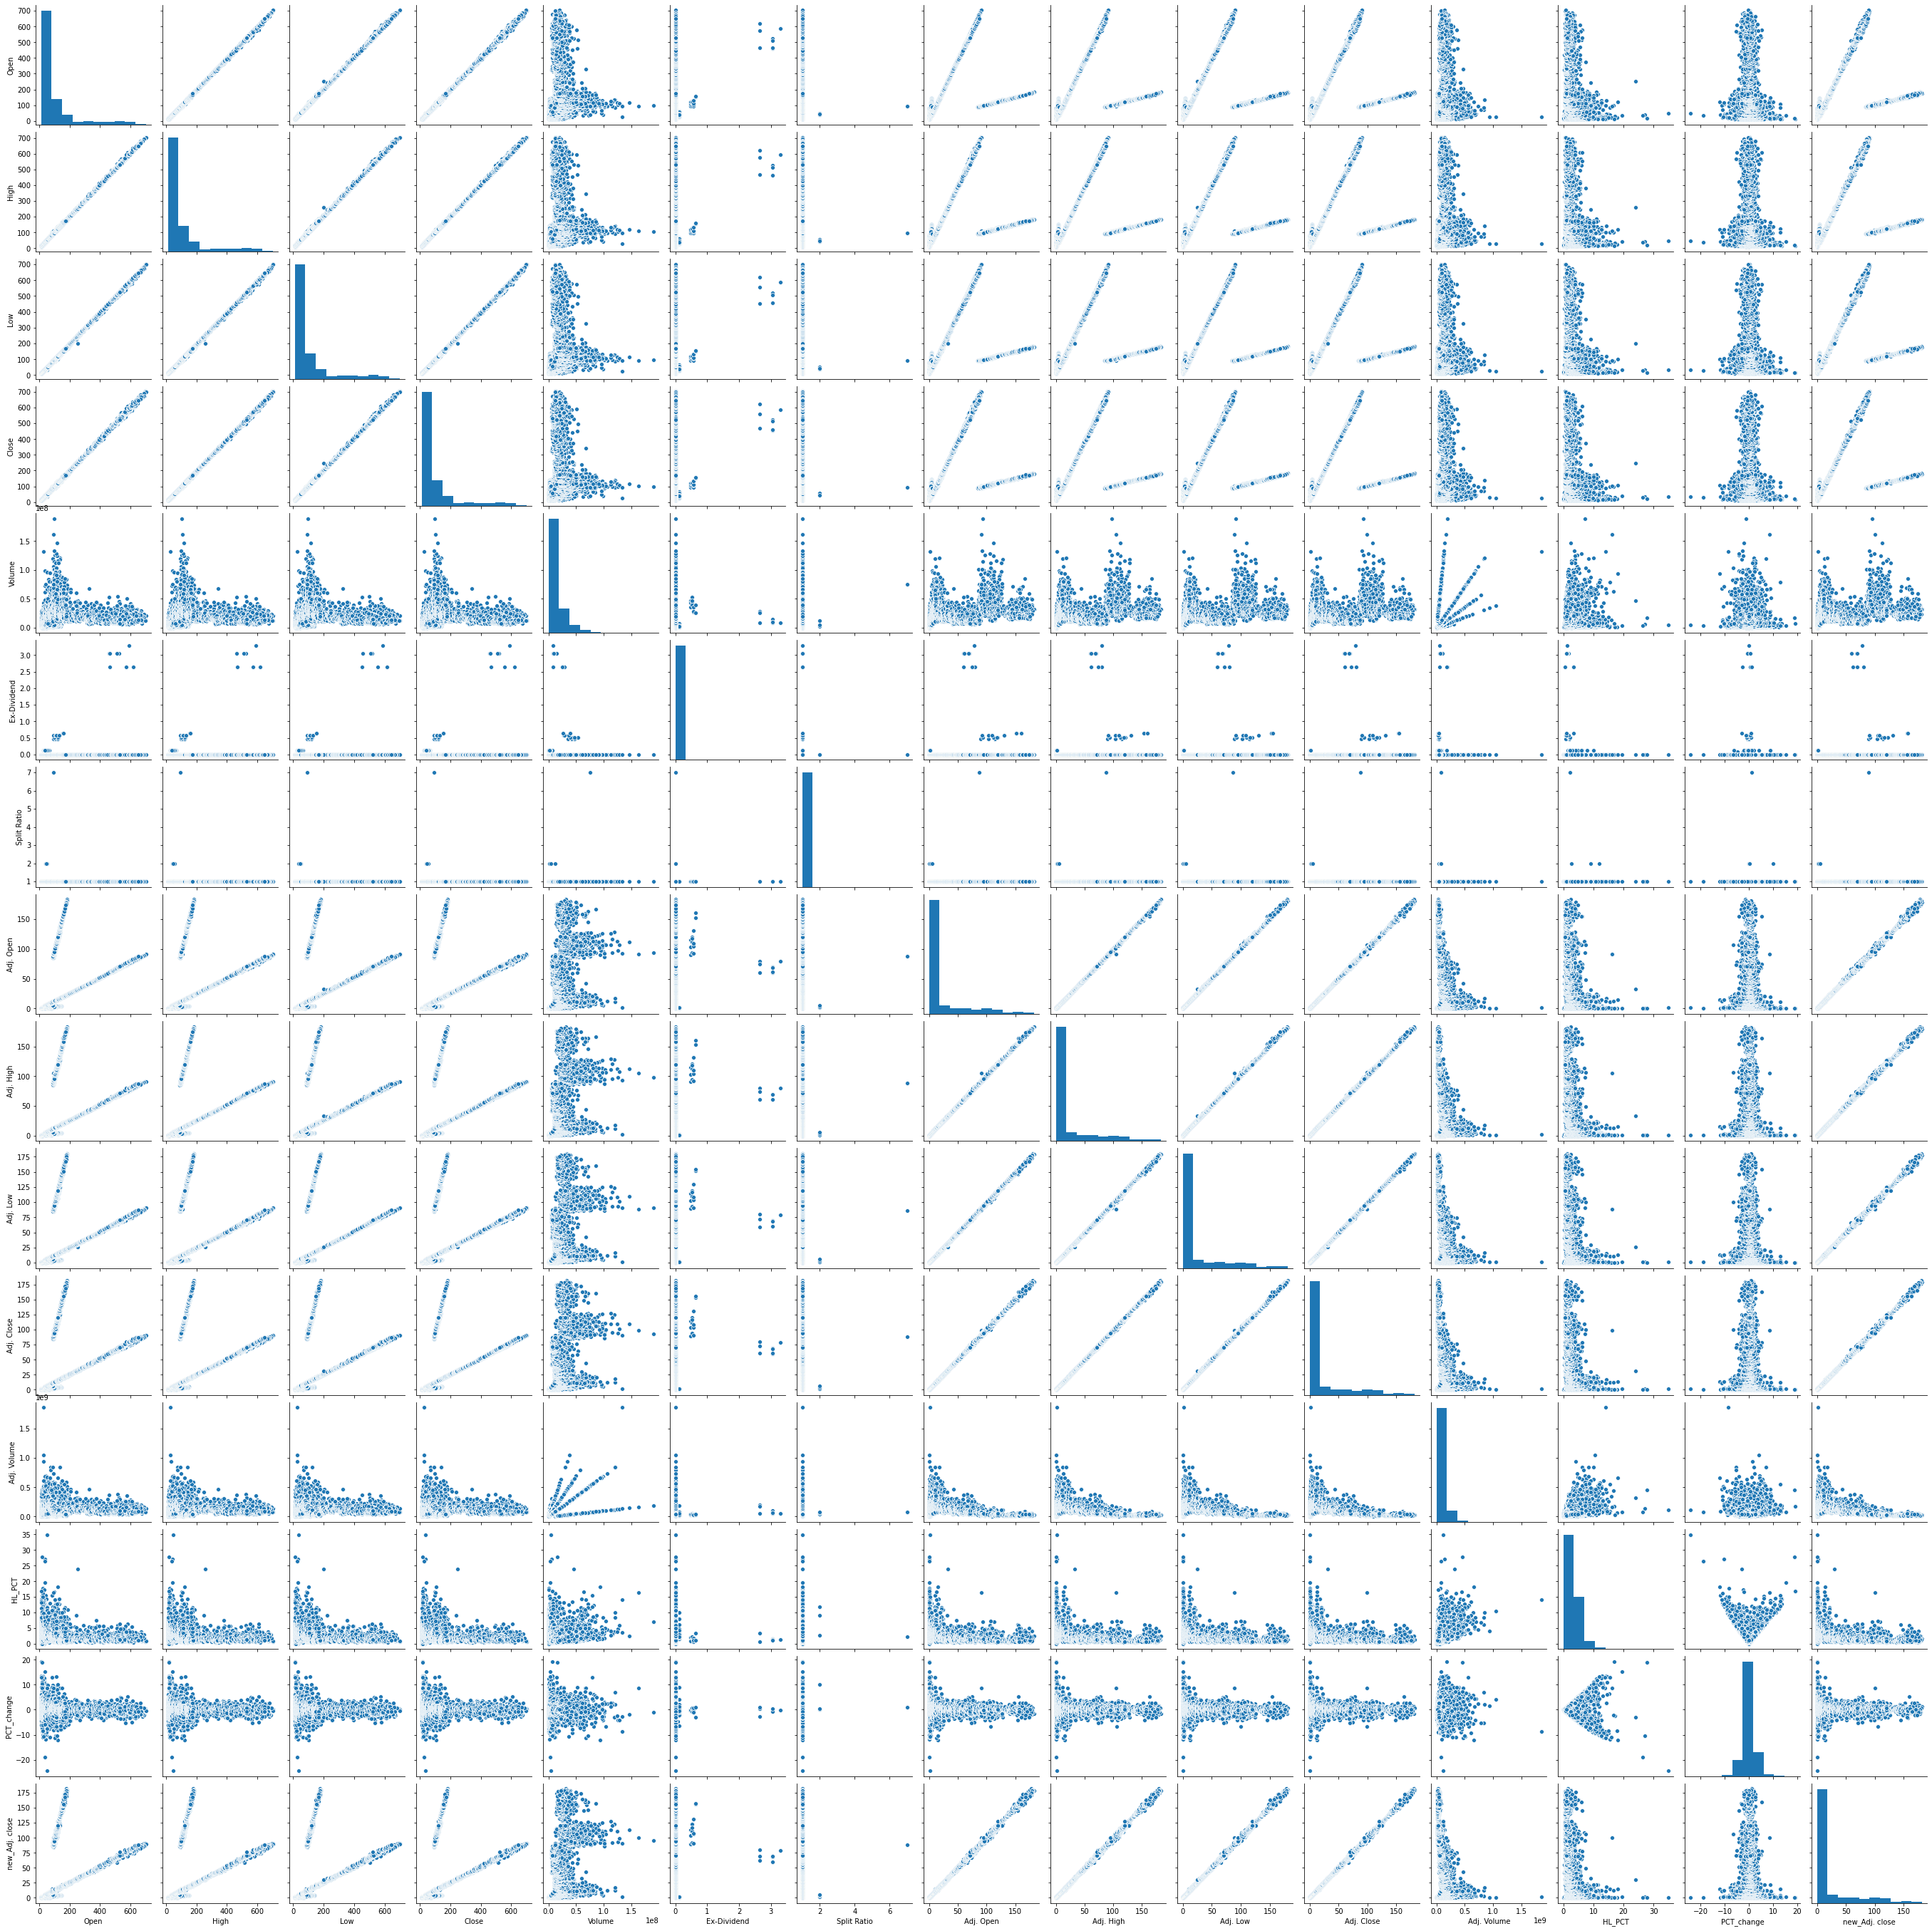

In [18]:
sns.pairplot(df)

In [23]:
df = df[["Adj. Close", "Adj. Volume", "HL_PCT", "PCT_change"]]
df.head()

,Adj. Close,Adj. Volume,HL_PCT,PCT_change
Date,,,,
1980-12-12,0.422706,117258400.0,0.417391,0.000000
1980-12-15,0.400652,43971200.0,0.477064,-0.474799
1980-12-16,0.371246,26432000.0,0.475248,-0.473000
1980-12-17,0.380362,21610400.0,0.502513,0.000000
1980-12-18,0.391536,18362400.0,0.450620,0.000000


In [24]:
df.shape

(9400, 4)

In [ ]:
x= df.iloc[:, 1:].values
y= df.iloc[:, :1].values

<AxesSubplot:xlabel='Date'>

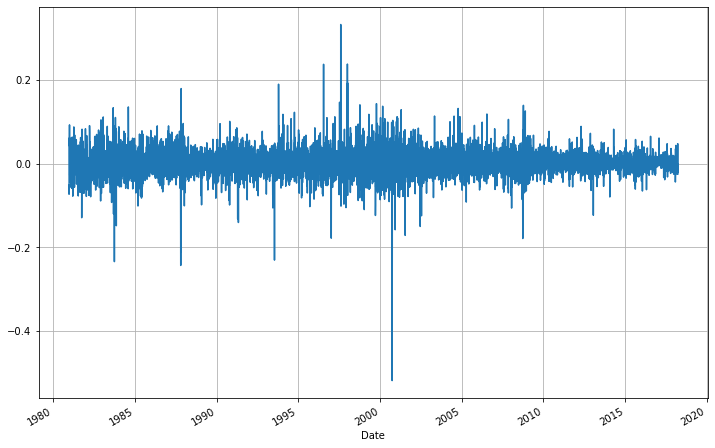

In [25]:
df['Adj. Close'].pct_change().plot(figsize = (12,8), grid = True)

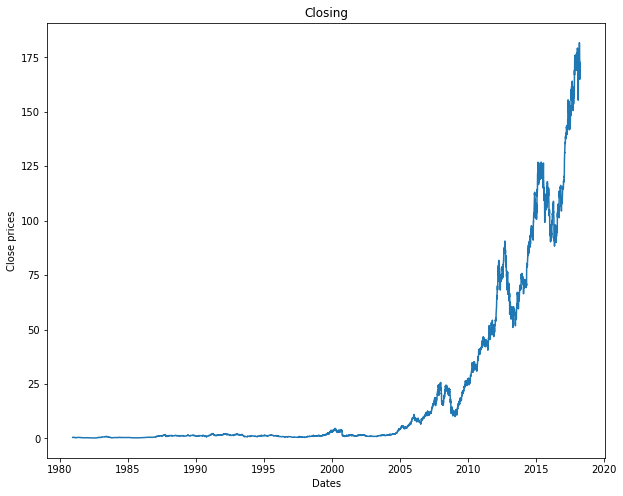

In [26]:
plt.figure(figsize =(10,8))
plt.plot(df["Adj. Close"])
plt.xlabel("Dates")
plt.ylabel("Close prices")
plt.title("Closing")
plt.show()

In [27]:
df.corr()

,Adj. Close,Adj. Volume,HL_PCT,PCT_change
Adj. Close,1.000000,-0.057168,-0.319927,0.006434
Adj. Volume,-0.057168,1.000000,0.367980,0.013150
HL_PCT,-0.319927,0.367980,1.000000,-0.023590
PCT_change,0.006434,0.013150,-0.023590,1.000000


In [39]:
#creating new column as label with last 10 rows as na
label = df["Adj. Close"].shift(-10)
print("total null values : ", label.isna().sum())
print("shape of label : ", label.shape)

print(df["Adj. Close"])
print(label)

total null values :  10
shape of label :  (9400,)
Date
1980-12-12      0.422706
1980-12-15      0.400652
1980-12-16      0.371246
1980-12-17      0.380362
1980-12-18      0.391536
                 ...    
2018-03-21    171.270000
2018-03-22    168.845000
2018-03-23    164.940000
2018-03-26    172.770000
2018-03-27    168.340000
Name: Adj. Close, Length: 9400, dtype: float64
Date
1980-12-12    0.529301
1980-12-15    0.516363
1980-12-16    0.501807
1980-12-17    0.507247
1980-12-18    0.496220
                ...   
2018-03-21         NaN
2018-03-22         NaN
2018-03-23         NaN
2018-03-26         NaN
2018-03-27         NaN
Name: Adj. Close, Length: 9400, dtype: float64


In [40]:
label.dropna(inplace = True)
y = np.array(label)
print("shape of label after dropping null values: ", y.shape)

shape of label after dropping null values:  (9390,)


In [41]:
x = (df[["Adj. Volume","HL_PCT","PCT_change"]])
print("shape of x dataset: ", x.shape)

shape of x dataset:  (9400, 3)


In [42]:
#creating a column to use for prediction later on
X_later = x[-10:]
x = x[:-10]
print("shape of x after removing X_later: ", x.shape)
print("shape of X_later :", X_later.shape)

shape of x after removing X_later:  (9390, 3)
shape of X_later : (10, 3)


In [43]:
# Splitting data into Train and Test datasets
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.3, random_state=24)

In [44]:
#build linear regression model
lr = LinearRegression()
model = lr.fit(Xtrain,Ytrain)
model

LinearRegression()

In [45]:
#printing the coefficient and intercept
print("the coefficient is:", model.coef_)
print("the intercept is:", model.intercept_)

the coefficient is: [ 3.02475717e-08 -6.15841163e+00 -1.09061858e-01]
the intercept is: 38.998894036802156


In [51]:
model.score(Xtest,Ytest)

0.1090168181735266

In [53]:
coef_df = pd.DataFrame(zip(x.columns, model.coef_), columns = ['features', 'estimated coefficients'])
coef_df

,features,estimated coefficients
0,Adj. Volume,3.024757e-08
1,HL_PCT,-6.158412e+00
2,PCT_change,-1.090619e-01


C:\Users\sagra\Miniconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


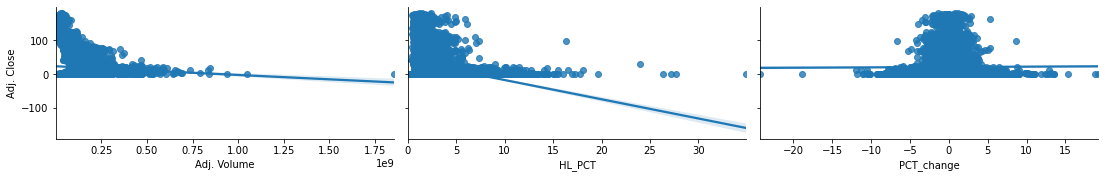

In [55]:
g = sns.pairplot(df, x_vars=['Adj. Volume','HL_PCT','PCT_change'],
             y_vars='Adj. Close', size=6, aspect=1, kind='reg', )
g.fig.set_size_inches(15,2)

In [60]:
forecast= []
forecast = model.predict(X_later)
y_pred = model.predict(Xtest)
print(y_pred)
print("***************************************************************************************")
print(forecast)

[-0.17962028 16.67295782 10.08416954 ... -4.77596476 12.43326136
 16.87893928]
***************************************************************************************
[30.63917407 32.19279172 34.96247781 26.73060134 33.04654944 26.52828098
 25.43339415 21.84580732 16.05139989 10.40479631]


In [57]:
# comparing the actual and predicted values
a = pd.DataFrame(Ytest)
b = pd.DataFrame(y_pred)
data = pd.concat([a,b], axis = 1, keys=['actual ', 'predicted'])
data

,actual,predicted
,0,0
0,0.560471,-0.179620
1,1.264577,16.672958
2,3.341362,10.084170
3,45.493934,27.280207
4,86.326091,34.105017
...,...,...
2812,12.440149,14.570914
2813,23.958853,25.306431
2814,1.132529,-4.775965


In [58]:
mse = mean_squared_error(Ytest, y_pred)
print("The MEAN SQUARED ERROR IS :", mse)

The MEAN SQUARED ERROR IS : 1339.5026626893039
